In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table

In [2]:
# Lee el catálogo de Fermi con astropy.
cat1 = Table.read('4fgl.fit', format='fits', hdu=1)

In [3]:
# Para el catálogo de SFR hay que hacer MUCHOS arreglos...
# Tiene problemas con las unidades de los tamaños de las fuentes.
# 0 -> ' (arcmin)    1-> " (arcsec)

cat2 = pd.read_csv('sfr.tsv', sep=';', skiprows=54)
cat2.drop([0,1], inplace=True)
cat2.reset_index(drop=True, inplace=True)

#Filtro el catálogo de SFR por las fuentes que se repiten
cat2['RA+DE'] = cat2['_RAJ2000'].map(str) + cat2['_DEJ2000'].map(str)
cat2.drop_duplicates(subset=['RA+DE'], inplace=True)
cat2.reset_index(inplace=True)

# Convertimos las columnas del catálogo SFR (string) a float.
cat2['_RAJ2000'] = pd.to_numeric(cat2['_RAJ2000'], errors='coerce')
cat2['_DEJ2000'] = pd.to_numeric(cat2['_DEJ2000'], errors='coerce')
cat2['Size1'] = pd.to_numeric(cat2['Size1'], errors='coerce')
cat2['Size2'] = pd.to_numeric(cat2['Size2'], errors='coerce')
cat2['x_Size1'] = pd.to_numeric(cat2['x_Size1'], errors='coerce')
cat2['x_Size2'] = pd.to_numeric(cat2['x_Size2'], errors='coerce')

cat2.iloc[19114,:]

/home/agostina/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


index                          48561
_RAJ2000                     125.324
_DEJ2000                    -40.1601
nSFR                    258.00-2.00 
GLON                                
GLAT                                
Type                              D 
Size1                           2200
x_Size1                            0
Size2                            NaN
x_Size2                          NaN
_RA.icrs                08 21 17.731
_DE.icrs               -40 09 36.364
RA+DE       125.32388084-40.16010116
Name: 19114, dtype: object

In [4]:
# ---------------------------CATÁLOGO SFR--------------------------------
# Extraemos las declinaciones y las ascenciones rectas.
de2, ra2 = cat2['_DEJ2000'], cat2['_RAJ2000']

#cat2

In [5]:
# Pasamos los tamaños angulares de las fuentes a grados.
# Size1 = tamaño máximo en ascensión recta. Size2 = tamaño máximo en declinación.
# 0 -> ' (arcmin)    1-> " (arcsec)

x_Size1, x_Size2 = cat2['x_Size1'].values, cat2['x_Size2'].values
Size1, Size2 = cat2['Size1'].values, cat2['Size2'].values

for i in range(len(Size1)):
    if x_Size1[i] == 0.0:
        Size1[i] = Size1[i]/60.
    elif x_Size1[i] == 1.0:
        Size1[i] = Size1[i]/3600.

for i in range(len(Size2)):
    if x_Size2[i] == 0.0:
        Size2[i] = Size2[i]/60.
    elif x_Size2[i] == 1.0:
        Size2[i] = Size2[i]/3600.

In [6]:
# En cada NaN que encuentre en x_Size le pedimos que reescriba los valores de Size a NaN.
# Ya que hay algunas fuentes que tienen su valor en el tamaño, pero sin saber su unidad.
# Así nos deshacemos de esos valores de los tamaños.
for i in range(len(Size1)):
    if np.isnan(x_Size1[i]) == True:
        Size1[i] = np.nan
        
for i in range(len(Size2)):
    if np.isnan(x_Size2[i]) == True:
        Size2[i] = np.nan       

In [7]:
# Calculamos la mediana de los tamaños en ascensión recta y declinación.
median_Size1 = cat2['Size1'].median()
median_Size2 = cat2['Size2'].median()

# Reemplazamos por el valor de mediana en los casos que no tienen valor asignado.
cat2['Size1'].fillna(median_Size1, inplace = True)
cat2['Size2'].fillna(median_Size2, inplace = True)

In [8]:
# Suponemos que el tamaño angular es a 3 sigma (99.7 %, casi 100 %). Y pasamos de 3 sigma  a 1 sigma (68.3 %).

std_ra2 = cat2['Size1'].values * 68.26 / 99.73
std_de2 = cat2['Size2'].values * 68.26 / 99.73

#cat2.iloc[11338,:]
cat2

,index,_RAJ2000,_DEJ2000,nSFR,GLON,GLAT,Type,Size1,x_Size1,Size2,x_Size2,_RA.icrs,_DE.icrs,RA+DE
0,0,266.218588,-28.836956,0.00+0.19,,,O,0.036667,NaN,0.066667,0.0,17 44 52.461,-28 50 13.040,266.21858766-28.83695552
1,1,266.293706,-28.853258,0.00+0.19,0.020,0.1300,O,0.036667,NaN,0.066667,0.0,17 45 10.490,-28 51 11.730,266.29370632-28.85325837
2,3,266.250852,-28.864577,0.00+0.19,359.980,0.1500,R,0.036667,NaN,0.033333,0.0,17 45 00.205,-28 51 52.479,266.25085224-28.86457737
3,4,266.258383,-28.869263,0.00+0.19,359.980,0.1500,R,0.036667,NaN,0.050000,0.0,17 45 02.012,-28 52 09.347,266.25838342-28.86926316
4,7,266.294233,-28.936590,0.00+0.19,359.980,0.1500,R,0.036667,NaN,3.333333,0.0,17 45 10.616,-28 56 11.726,266.29423327-28.93659047
5,8,266.268723,-28.856713,0.00+0.19,0.010,0.1400,IR,0.036667,NaN,0.016667,0.0,17 45 04.494,-28 51 24.166,266.26872295-28.85671285
6,9,266.203999,-28.902583,0.00+0.19,359.940,0.1700,IR,0.036667,NaN,0.133333,0.0,17 44 48.960,-28 54 09.298,266.20399924-28.90258282
7,10,266.228205,-28.868326,0.00+0.19,359.971,0.1700,IR,0.036667,NaN,0.033333,NaN,17 44 54.769,-28 52 05.974,266.22820450-28.86832608
8,14,266.222561,-28.872215,0.00+0.19,359.971,0.1700,IR,0.036667,NaN,0.033333,0.0,17 44 53.415,-28 52 19.973,266.22256122-28.87221460
9,19,266.222561,-28.872187,0.00+0.19,359.971,0.1700,M,0.036667,NaN,0.011111,1.0,17 44 53.415,-28 52 19.873,266.22256104-28.87218682


In [9]:
# Calculamos la mediana de los tamaños en ascensión recta y declinación.
#median_Size1 = cat2['Size1'].median()
#median_Size2 = cat2['Size2'].median()

# Reemplazamos por el valor de mediana en los casos que no tienen valor asignado.
#cat2['Size1'].fillna(median_Size1, inplace = True)
#cat2['Size2'].fillna(median_Size2, inplace = True)

In [10]:
# ---------------------------CATÁLOGO FERMI------------------------------

# Convertimos cat1 a un DataFrame de Pandas para sacar provecho de sus funciones.
table1 = cat1.to_pandas()

# Nos quedamos con las fuentes que no están asociadas.
mask0 = table1['CLASS'] == b'     '
fgl_unassoc = table1[mask0]
fgl_unassoc.reset_index(drop=True, inplace=True)

#print((fgl_unassoc['Conf_95_PosAng'] == np.nan).sum())

cota = 2

for i, value in enumerate(table1.RAJ2000):
    #print(i, value)
    #print(table1.DEJ2000[i])
    if (abs(value-(83.8221)) < cota) and (abs(table1.DEJ2000[i]-(-5.3911)) < cota):
        print(i, value, table1.DEJ2000[i])
        
#i = 977
#table1.head
#table1.values[i]

977 82.3727035522461 -5.3617
1031 85.41400146484375 -5.6974


In [11]:
# Extraemos las declinaciones y las ascenciones rectas.
de1, ra1 = fgl_unassoc['DEJ2000'].values, fgl_unassoc['RAJ2000'].values

In [12]:
# Calculamos la mediana de los semiejes mayor y menor.
median_amaj = fgl_unassoc['Conf_95_SemiMajor'].median()
median_amin = fgl_unassoc['Conf_95_SemiMinor'].median()

# Reemplazamos con la mediana donde no están definidos el semieje mayor y menor.

#mask1 = fgl_unassoc['amaj'].isnull()
#fgl_unassoc[ mask1 ] = fgl_unassoc[ mask1 ].fillna(mean_amaj)

fgl_unassoc['Conf_95_SemiMajor'].fillna(median_amaj, inplace = True)
fgl_unassoc['Conf_95_SemiMinor'].fillna(median_amin, inplace = True)

#print(cat2.iloc[33566, ])
#print(fgl_unassoc.iloc[0, ])

fgl_unassoc


/home/agostina/.local/lib/python3.5/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Extended_Source_Name,...,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,b'4FGL J0000.3-7355 ',0.098300,-73.921997,307.708984,-42.729538,0.0525,0.0510,-62.700001,881,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
1,b'4FGL J0003.2+2207 ',0.805800,22.130199,108.438545,-39.380795,0.0974,0.0864,-75.209999,1052,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
2,b'4FGL J0003.3+2511 ',0.832300,25.191200,109.381638,-36.411484,0.1021,0.0901,63.580002,1342,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
3,b'4FGL J0003.6+3059 ',0.904500,30.989799,111.004486,-30.771994,0.0810,0.0714,-83.550003,235,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
4,b'4FGL J0004.0+5715 ',1.001700,57.257801,116.526321,-5.022866,0.0852,0.0667,-8.210000,1224,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
5,b'4FGL J0004.4-4001 ',1.118400,-40.025101,336.991486,-73.845337,0.1358,0.0888,56.160000,1132,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
6,b'4FGL J0005.6+6746 ',1.415500,67.768799,118.608437,5.282127,0.1891,0.1576,19.830000,162,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
7,b'4FGL J0006.6+4618 ',1.669700,46.304600,114.920349,-15.869719,0.0647,0.0556,-81.839996,783,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
8,b'4FGL J0008.4+6926 ',2.107200,69.440903,119.148109,6.885729,0.0820,0.0548,57.419998,162,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0
9,b'4FGL J0008.9+2509 ',2.235800,25.153601,110.915108,-36.724590,0.2518,0.1963,-6.180000,1342,b' ',...,b' ',b' ',b' ',b' ',0.0,0.0,NaN,NaN,NaN,0


In [13]:
# Pasamos los valores de los semiejes de grados a radianes.
a = fgl_unassoc['Conf_95_SemiMajor'].values * np.pi / 180.
b = fgl_unassoc['Conf_95_SemiMinor'].values * np.pi / 180.

# Definimos un ángulo que sea -abs(phi) para usar en la matriz de rotación.
thetta = - np.abs(fgl_unassoc['Conf_95_PosAng'].values * np.pi / 180.)

# Términos que salen de la matriz de rotación y se usan para calcular los máximos.
term1 = np.sin(thetta)**2/a**2 + np.cos(thetta)**2/b**2 
term2 = np.cos(thetta)**2/a**2 + np.sin(thetta)**2/b**2
term3 = np.sin(2.0 * thetta) * (1./b**2 - 1./a**2)

# Calculamos las desviaciones estándar y las pasamos de radianes a grados.
std_ra1 = (180./np.pi) * 1./np.sqrt(term1 - term3**2/(4.*term2))
std_de1 = (180./np.pi) * 1./np.sqrt(term2 - term3**2/(4.*term1))

# Pasamos a la información de las desviaciones estándar a la tabla de Fermi.
fgl_unassoc['std_ra'] = std_ra1
fgl_unassoc['std_de'] = std_de1

/home/agostina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/agostina/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
#-------------------------------- CORRELACIÓN ---------------------------------------

# Calculamos el R estadístico (va a ser un vector) y guarda un vector en cada posición de rlist.
# rlist = [ array_1, array_2, ..., array_i, array_i+1, ...]
# rlist tiene len(cat1) posiciones.
# len(array) = len(cat2).

rlist = []
for i in range(len(de1)):
    t1 = (ra1[i] - ra2)**2/(std_ra1[i]**2 + std_ra2**2)
    t2 = (de1[i] - de2)**2/(std_de1[i]**2 + std_de2**2)
    r = np.sqrt(t1+t2)
    rlist.append(r)

In [15]:
# Imprimimos el valor de rlist, con la condición de correlación posicional (<0.3) y contamos el número de matches.
# El número de matches corresponde al número de fuentes de Fermi que tuvieron correlación con al menos una
# fuente del catálogo 2.
# Cada posición de rlist corresponde con cada fuente de Fermi, y el número en esa posición indica el número de 
# fuentes del catálogo 2 con las que tuvo coincidencia posicional.

count = 0
matches = []

for l in rlist:
    m = (l <= 3.03).sum()
    if m > 0:
        count += 1
        matches.append(m)
        
print(count)
print(matches)

257
[13, 1, 2, 1, 41, 5, 1, 8, 2, 1, 1, 2, 1, 43, 6, 1, 1, 35, 16, 97, 2, 9, 22, 1, 77, 31, 5, 82, 14, 13, 152, 1, 1, 1, 26, 1, 30, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1, 50, 48, 2, 1, 1, 20, 25, 1, 7, 6, 3, 6, 16, 9, 5, 66, 1, 1, 6, 1, 8, 1, 20, 1, 2, 2, 6, 3, 38, 6, 1, 2, 4, 1, 2, 5, 1, 1, 6, 37, 4, 1, 1, 1, 2, 1, 2, 29, 1, 1, 5, 3, 59, 65, 1, 1, 1, 52, 17, 39, 10, 75, 1, 3, 2, 5, 1, 21, 6, 36, 38, 12, 2, 3, 1, 1, 2, 27, 1, 1, 6, 2, 4, 1, 2, 1, 2, 6, 2, 1, 1, 1, 2, 8, 4, 1, 1, 32, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 10, 12, 3, 1, 1, 1, 1, 1, 1, 1, 1, 16, 3, 86, 36, 10, 1, 3, 1, 1, 3, 3, 12, 23, 65, 1, 8, 6, 1, 7, 8, 4, 8, 1, 184, 1, 19, 46, 14, 10, 84, 25, 118, 20, 25, 6, 6, 7, 125, 92, 145, 27, 5, 1, 31, 7, 4, 5, 3, 3, 1, 4, 9, 32, 5, 7, 9, 10, 2, 8, 1, 27, 12, 80, 10, 8, 9, 2, 2, 2, 1, 2, 2, 86, 1, 37, 44, 1, 1, 82, 13, 2, 6, 1, 1, 2, 3, 1]


In [16]:
count = 0
matches = []
idx1 = []
idx2 = []

for i in range(len(rlist)): # len(rlist) = len(fermi_unassoc)
    x = rlist[i] <= 3.03
    m = x.sum()
    
    if m > 0:
        count += 1
        matches.append(m)
        idx1.append(i) # la lista idx1 guarda enteros, que corresponden al id de las fuentes de unassoc_fermi que tiene cross_id con fuentes del catálogo SFR
    
    idx2.append(x) # la lista idx2 guarda len(fermi) arrays booleanos de longitud del catálogo SFR

In [17]:
mask0 = table1['CLASS'] == b'     '
# fgl_unassoc = table1[mask0]
# fgl_unassoc.reset_index(drop=True, inplace=True)
# Creamos una lista para cada fuente de Fermi que tiene correlación posicional con al menos una fuente del catálogo
# de SFR. Luego con "append" agregamos la lista obtenida a "final_table".

final_table = []

for i in range(len(idx1)):
    new_table = pd.DataFrame()
    new_table['SFR_RAJ2000'] = cat2['_RAJ2000'][np.array(idx2[idx1[i]])]
    new_table['SFR_DEJ2000'] = cat2['_DEJ2000'][np.array(idx2[idx1[i]])]
    new_table['SIZE_RA'] = cat2['Size1'][np.array(idx2[idx1[i]])]
    new_table['SIZE_DE'] = cat2['Size2'][np.array(idx2[idx1[i]])]
    new_table['FGL_N'] = idx1[i]
    new_table['FGL_RAJ2000'] = fgl_unassoc['RAJ2000'][idx1[i]]
    new_table['FGL_DEJ2000'] = fgl_unassoc['DEJ2000'][idx1[i]]
    new_table['FGL_SIGMA_RA'] = fgl_unassoc['std_ra'][idx1[i]]
    new_table['FGL_SIGMA_DE'] = fgl_unassoc['std_de'][idx1[i]]
    new_table['SFR_N'] = new_table.index
    
    new_table.reset_index(drop=True, inplace=True)
    new_table = new_table[['FGL_N', 'FGL_RAJ2000', 'FGL_DEJ2000', 'FGL_SIGMA_RA', 'FGL_SIGMA_DE', 'SFR_N', 'SFR_RAJ2000', 'SFR_DEJ2000', 'SIZE_RA', 'SIZE_DE']]
    final_table.append(new_table)

In [18]:
# Con "concat" pegamos las listas obtenidas en "final_table" y lo llamamos "output_table".

output_table = pd.concat(final_table)
output_table

,FGL_N,FGL_RAJ2000,FGL_DEJ2000,FGL_SIGMA_RA,FGL_SIGMA_DE,SFR_N,SFR_RAJ2000,SFR_DEJ2000,SIZE_RA,SIZE_DE
0,6,1.415500,67.768799,0.161538,0.185747,14081,0.720290,67.244982,2.000000,0.500000
1,6,1.415500,67.768799,0.161538,0.185747,14082,0.686588,67.328316,1.016667,0.150000
2,6,1.415500,67.768799,0.161538,0.185747,14084,0.720297,67.278315,2.500000,0.033333
3,6,1.415500,67.768799,0.161538,0.185747,14130,1.508469,67.244929,0.036667,0.333333
4,6,1.415500,67.768799,0.161538,0.185747,14131,1.550199,67.248536,0.036667,0.133333
5,6,1.415500,67.768799,0.161538,0.185747,14132,1.522821,67.276039,0.200000,0.116667
6,6,1.415500,67.768799,0.161538,0.185747,14134,1.398880,67.240495,0.036667,0.100000
7,6,1.415500,67.768799,0.161538,0.185747,14136,1.280958,67.412450,0.036667,0.066667
8,6,1.415500,67.768799,0.161538,0.185747,14137,1.436959,67.469103,0.036667,0.050000
9,6,1.415500,67.768799,0.161538,0.185747,14138,1.352117,67.278277,0.036667,0.033333


In [19]:
# Guardamos la salida en un archivo .csv
output_table.to_csv('out_4fgl_sfr.csv')

i=0
output_table['FGL_N'][i]

0       6
0       8
0      11
0      32
0     127
0     130
0     138
0     144
0     151
0     162
0     176
0     187
0     196
0     198
0     200
0     202
0     204
0     205
0     210
0     211
0     215
0     220
0     222
0     228
0     235
0     236
0     237
0     238
0     239
0     243
     ... 
0    1290
0    1293
0    1298
0    1300
0    1302
0    1304
0    1305
0    1307
0    1308
0    1309
0    1311
0    1313
0    1323
0    1338
0    1363
0    1382
0    1392
0    1398
0    1403
0    1414
0    1425
0    1444
0    1447
0    1458
0    1461
0    1465
0    1478
0    1481
0    1491
0    1522
Name: FGL_N, Length: 257, dtype: int64

In [20]:
# Para que sea más amigable a la vista, guardamos otro archico .txt donde le pasamos el formato que queremos.
salida = np.column_stack([output_table.index, output_table.values[:,0], output_table.values[:,1], output_table.values[:,2], output_table.values[:,3], output_table.values[:,4], output_table.values[:,5], output_table.values[:,6], output_table.values[:,7], output_table.values[:,8], output_table.values[:,9]])
np.savetxt('out_4fgl_sfr.txt', salida, fmt=['%i', '%i', '%f', '%f', '%f', '%f', '%i', '%f', '%f', '%f', '%f'], header='index fgl_n fgl_raj2000 fgl_dej2000 fgl_sigma_ra flg_sigma_de sfr_n sfr_raj2000 sfr_dej2000 size_ra size_de')

In [21]:
# Ploteamos todas las fuentes Fermi y SFR que están correlacionadas, para verificar que esa correlación existe.
# Correr dos veces para conseguir el plot.

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

plt.figure(figsize=(10,6))
plt.title('Cross correlated 4FGL unassociated sources with SFR sources')
plt.xlabel('RAJ2000 [deg]')
plt.ylabel('DEJ2000 [deg]')
#plt.set_facecolor('#33477c')
#plt.style.use('dark_background')
plt.scatter(output_table['FGL_RAJ2000'], output_table['FGL_DEJ2000'], c = 'r', s=3)
plt.scatter(output_table['SFR_RAJ2000'], output_table['SFR_DEJ2000'], c = 'b', s=3)

In [22]:
from ipywidgets import interact

In [23]:
# Hacemos un plot interactivo, donde podemos elegir la fuente Fermi, y plotea esa fuente con sus supuestas
# correlaciones de las fuentes SFR.

@interact(i=idx1)
def plot_match(i):
    n = idx1.index(i)
    plt.figure(figsize=(5,5))
    plt.title('4FGL %s source and its cross-corr. SFR source' % i)
    plt.xlabel('RAJ2000 [deg]')
    plt.ylabel('DEJ2000 [deg]')
    plt.scatter(final_table[n]['SFR_RAJ2000'], final_table[n]['SFR_DEJ2000'], c = 'r', s=5)
    plt.scatter(final_table[n]['FGL_RAJ2000'], final_table[n]['FGL_DEJ2000'], c = 'b', s=5)

interactive(children=(Dropdown(description='i', options=(6, 8, 11, 32, 127, 130, 138, 144, 151, 162, 176, 187,…

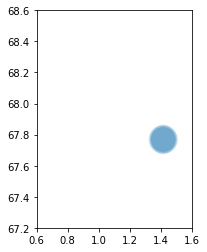

0.066667

In [24]:
delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1.415500, 67.768799), 0.1576, 0.1891, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(0.6, 1.6)
plt.ylim(67.2, 68.6)

plt.show()

0.05
0.066667

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

#ells = [Ellipse(xy=(fgl_unassoc['RAJ2000'][idx1[i]], fgl_unassoc['DEJ2000'][idx1[i]]),
#                width=fgl_unassoc['Conf_95_SemiMinor'][idx1[i]], height=fgl_unassoc['Conf_95_SemiMajor'][idx1[i]],
#                angle=fgl_unassoc['Conf_95_PosAng'][idx1[i]])
#        for i in range(idx1[i])]

# ells = [Ellipse(xy=(cat2['_RAJ2000'][np.array(idx2[idx1[i]])],cat2['_DEJ2000'][np.array(idx2[idx1[i]])]),
#                 width=fgl_unassoc['Conf_95_SemiMinor'][idx1[i]],
#                 height=fgl_unassoc['Conf_95_SemiMajor'][idx1[i]],
#                 angle=fgl_unassoc['Conf_95_PosAng'][idx1[i]]) 
#                 for i in range(NUM)]

#ells = [Ellipse(xy=(cat2['_RAJ2000'][np.array(idx2[idx1[i]])], cat2['_DEJ2000'][np.array(idx2[idx1[i]]),
#                width=fgl_unassoc['Conf_95_SemiMinor'][idx1[i]], height=fgl_unassoc['Conf_95_SemiMajor'][idx1[i]],
#                angle=fgl_unassoc['Conf_95_PosAng'][idx1[i]])
#        for i in range(idx1[i])]

i=0

ells = [Ellipse(xy=(fgl_unassoc['_RAJ2000'][np.array(idx1[i])], fgl_unassoc['_DEJ2000'][np.array(idx1[i])]),
                width=fgl_unassoc['Conf_95_SemiMinor'][idx1[i]], height=fgl_unassoc['Conf_95_SemiMajor'][idx1[i]],
                angle=fgl_unassoc['Conf_95_PosAng'][idx1[i]])
        for i in range(idx1[i])]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(0.8)
    e.set_facecolor((0,0,0.8))

ax.set_xlim(0.5, 2.0)
ax.set_ylim(67.0, 69.0)

plt.show()


KeyError: '_RAJ2000'

# gcirc (old)

from pydl.goddard.astro import gcirc

mylist = []
for i in range(len(de1)):
    dist = gcirc(ra1[i], de1[i], ra2, de2, units=2)
    w = dist[ np.abs(dist) <= 30 ]
    if len(w) > 0:
        mylist.append(w)

len(mylist)

suma = 0
for l in mylist:
    suma = len(l) + suma
    
print(suma)